#                                                      Sprint 9


##                                Prácticas en el departamento de analítica de Showz 
###                                    (empresa de venta de entradas de eventos)  
####                          Tu primera tarea es : ayudar a optimizar los gastos de marketing. 
---- 
Cuentas con:

-registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018;
-un archivo con los pedidos en este periodo;
-estadísticas de gastos de marketing.

Lo que vas a investigar: 

1) Cómo los clientes usan el servicio,
2) Cuándo empiezan a comprar,
3) Cuánto dinero aporta cada cliente a la compañía,
4) Cuándo los ingresos cubren el costo de adquisición de los clientes.

Paso 1. Acceda los datos y prepáralos para el análisis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)

In [2]:
visits = pd.read_csv('../visits_log_us.csv')
orders = pd.read_csv('../orders_log_us.csv')
costs = pd.read_csv('../costs_us.csv')


### LIMPIEZA DE DATOS         (VISITS, ORDER Y COSTS)

In [3]:
visits.head(5)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Es necesario cambiar el formato de las columnas End Ts y Start Ts a  DataTime para poder manpular mejor la infromación más adelante

In [5]:
visits['End Ts'] = pd.to_datetime(visits['End Ts'], format='%Y-%m-%d %H:%M:%S')
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], format='%Y-%m-%d %H:%M:%S')

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [7]:
visits= visits.rename(columns={ 'Device': 'device',
                       'End Ts': 'session_end_ts' ,
                       'Source Id' : 'source_id',
                       'Start Ts' : 'session_start_ts' ,
                       'Uid' : 'uid'})

Cambiar los títulos de las columnas a mínusculas para tener una mejor manipulación de éstas al momento de nombrarlas

In [8]:
visits.head()

,device,session_end_ts,source_id,session_start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


#### ORDERS

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [10]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Se necesita modificar el tipo de formato de la columna Buy ts a DataTime

In [11]:
orders['Buy ts'] = pd.to_datetime(orders['Buy Ts'], format='%Y-%m-%d %H:%M:%S')

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  object        
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
 3   Buy ts   50415 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1), uint64(1)
memory usage: 1.5+ MB


Se mofidican los títulos de las columnas a mínusculas para mejor manipulación de datos 

In [13]:
orders = orders.rename(columns={'Buy Ts' :'buy_ts',
                       'Revenue': 'revenue',
                       'Uid': 'uid'})

In [14]:
orders.head()

,buy_ts,revenue,uid,Buy ts
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


#### COSTS

In [15]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [16]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [17]:
costs['dt'] = pd.to_datetime(costs['dt'])

Se modifica el tipo de dato de la columna dt a DataTime

In [18]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [19]:
costs['dt'].min(), costs['dt'].max()

(Timestamp('2017-06-01 00:00:00'), Timestamp('2018-05-31 00:00:00'))

Exportamos los valores Máximos y Mínimos para tenerlos a la mano más adelante

# Paso 2. Haz informes y calcula métricas 

### Visitas:

#### 1.¿Cuántas personas lo usan cada día, semana y mes?

In [20]:
visits['session_month']= visits['session_end_ts'].dt.to_period('M').dt.start_time
visits['session_week']= visits['session_end_ts'].dt.isocalendar().week
visits['session_date']= visits['session_end_ts'].dt.date

In [21]:
visits.head()

,device,session_end_ts,source_id,session_start_ts,uid,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,52,2017-12-27


In [22]:
#calcular DAU/ WAU/ MAU

dau= visits.groupby('session_date').agg({'uid':'nunique'})
wau= visits.groupby('session_week').agg({'uid':'nunique'})
mau= visits.groupby('session_month').agg({'uid':'nunique'})

print('DAU:', int(dau.mean()), 'visitantes')
print('WAU:', int(wau.mean()), 'visitantes')
print('MAU:', int(mau.mean()), 'visitantes')

DAU: 905 visitantes
WAU: 5825 visitantes
MAU: 21441 visitantes


C:\Users\HP\AppData\Local\Temp\ipykernel_5656\1592092798.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('DAU:', int(dau.mean()), 'visitantes')
C:\Users\HP\AppData\Local\Temp\ipykernel_5656\1592092798.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('WAU:', int(wau.mean()), 'visitantes')
C:\Users\HP\AppData\Local\Temp\ipykernel_5656\1592092798.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('MAU:', int(mau.mean()), 'visitantes')


#### COMENTARIOS
DAU (Daily Active Users): En promedio, 905 usuarios únicos visitan la plataforma cada día. Esto indica una base diaria sólida y constante de interacción.

WAU (Weekly Active Users): Cada semana, el número asciende a 5,825 usuarios únicos, lo que sugiere que muchos usuarios no visitan todos los días, pero sí regresan con frecuencia dentro de la misma semana.

MAU (Monthly Active Users): A nivel mensual, se registran 21,441 usuarios únicos, lo que refleja una comunidad activa y amplia que se mantiene conectada con la plataforma.

#### ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

In [23]:
session_per_user = visits.groupby('session_date').agg({'uid':['count','nunique']})
session_per_user.columns= ['n_sessions', 'n_users']
session_per_user['sess_per_user'] = session_per_user['n_sessions']/ session_per_user['n_users']
session_per_user.head()

,n_sessions,n_users,sess_per_user
session_date,,,
2017-06-01,659,600,1.098333
2017-06-02,660,610,1.081967
2017-06-03,477,444,1.074324
2017-06-04,505,472,1.069915
2017-06-05,893,820,1.089024


In [24]:
print('promedio de sessiones por usuario {} al día'.format(round(session_per_user['sess_per_user'].mean(),2)))

promedio de sessiones por usuario 1.08 al día


#### COMENTARIOS

El promedio de sesiones por usuario al día es de 1.08, lo que indica que, en general, cada usuario inicia poco más de una sesión diaria en la plataforma.

- Los usuarios tienden a interactuar con la plataforma una vez al día, con algunos regresando por una segunda sesión. Esto sugiere que el contenido o funcionalidad es lo suficientemente relevante como para mantener el interés diario.

- Baja repetición en el mismo día: Aunque hay usuarios que regresan más de una vez, el número no es alto. Esto puede deberse a que la plataforma satisface sus necesidades en una sola visita, o que el tipo de contenido no requiere múltiples accesos diarios.

- Oportunidad de engagement: Si el objetivo es aumentar la frecuencia de uso, se podrían explorar estrategias como notificaciones, contenido dinámico, o funcionalidades que inviten a regresar más de una vez al día.

#### ¿Cuál es la duración de cada sesión?

In [25]:
visits['session_duration']= (visits['session_end_ts']- visits['session_start_ts']).dt.seconds
visits['session_duration'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

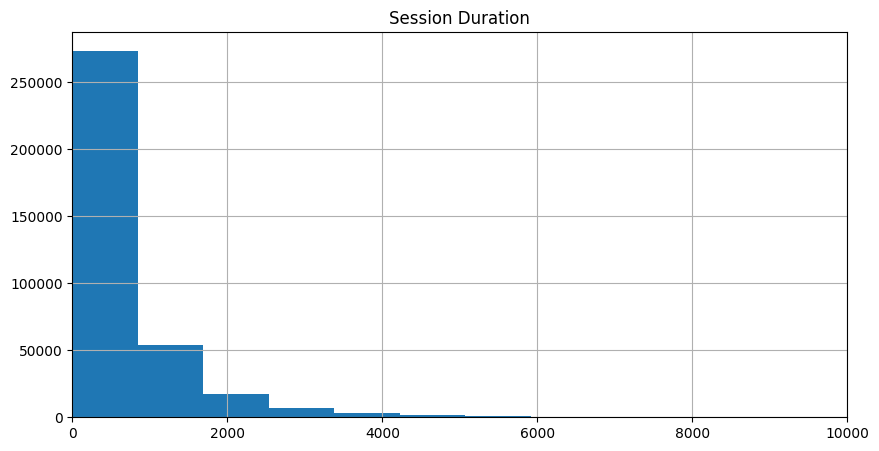

In [26]:
plt.figure(figsize=(10,5))
visits['session_duration'].hist(bins=100).set(title='Session Duration')
plt.xlim(0, 10000)
plt.show

#### COMENTARIOS

- Sesiones breves predominan: La mediana de 5 minutos indica que la mayoría de los usuarios tienen sesiones cortas, probablemente enfocadas en tareas rápidas o consultas específicas.

- Alta dispersión: La desviación estándar de más de 1,000 segundos y un máximo extremo de casi 24 horas sugieren que hay outliers o sesiones atípicas que podrían deberse a errores de registro, sesiones abiertas sin actividad, o comportamientos muy distintos entre usuarios.

- Sesiones de 0 segundos: La presencia de sesiones con duración cero podría indicar problemas técnicos, cierres abruptos, o simplemente visitas sin interacción significativa.

#### ¿Con qué frecuencia los usuarios regresan?

In [27]:
#Encontrar las sesiones inciales
first_visits = visits.groupby('uid').agg({'session_start_ts':'min'}).reset_index()
first_visits.columns =['uid','first_session_start_ts']
first_visits.head()

,uid,first_session_start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [28]:
#Encontrar sesiones mensuales
first_visits['first_session_dt'] = first_visits['first_session_start_ts'].dt.date
first_visits['first_session_month'] = first_visits['first_session_start_ts'].dt.to_period('M').dt.start_time
first_visits.head()

,uid,first_session_start_ts,first_session_dt,first_session_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-01


In [29]:
#fusionar datos
complete_visits= pd.merge(first_visits, visits, on='uid' )
complete_visits.head()

,uid,first_session_start_ts,first_session_dt,first_session_month,device,session_end_ts,source_id,session_start_ts,session_month,session_week,session_date,session_duration
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018-03-01,9,2018-03-01,360
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018-02-01,6,2018-02-06,120
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017-06-01,23,2017-06-07,60
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03-01,10,2018-03-11,360
4,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-01,38,2017-09-18,1080


In [30]:
#calcular el ciclo de vida
complete_visits ['life_cicle']= (complete_visits['session_month'].dt.month - complete_visits['first_session_month'].dt.month)
complete_visits ['life_cicle']+= 12*(complete_visits['session_month'].dt.year - complete_visits['first_session_month'].dt.year)
complete_visits.head()

,uid,first_session_start_ts,first_session_dt,first_session_month,device,session_end_ts,source_id,session_start_ts,session_month,session_week,session_date,session_duration,life_cicle
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018-03-01,9,2018-03-01,360,0
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018-02-01,6,2018-02-06,120,0
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017-06-01,23,2017-06-07,60,0
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03-01,10,2018-03-11,360,6
4,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-01,38,2017-09-18,1080,0


In [31]:
#Analisis de Cohort
cohorts= complete_visits.pivot_table(
    index= 'first_session_month',
    columns= 'life_cicle',
    values='uid',
    aggfunc= 'nunique'
)
cohorts.fillna('')

life_cicle,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06-01,13255.0,1047.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13136.0,741.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08-01,10177.0,784.0,641.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09-01,16696.0,1433.0,1157.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10-01,25971.0,2044.0,1358.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11-01,27246.0,2136.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12-01,25267.0,1411.0,960.0,786.0,512.0,481.0,,,,,,
2018-01-01,22614.0,1360.0,890.0,565.0,458.0,,,,,,,
2018-02-01,22194.0,1269.0,564.0,447.0,,,,,,,,


C:\Users\HP\AppData\Local\Temp\ipykernel_5656\3646916758.py:5: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  retention= pd.concat([retention, cohorts[col]/cohorts[0]], axis=1)


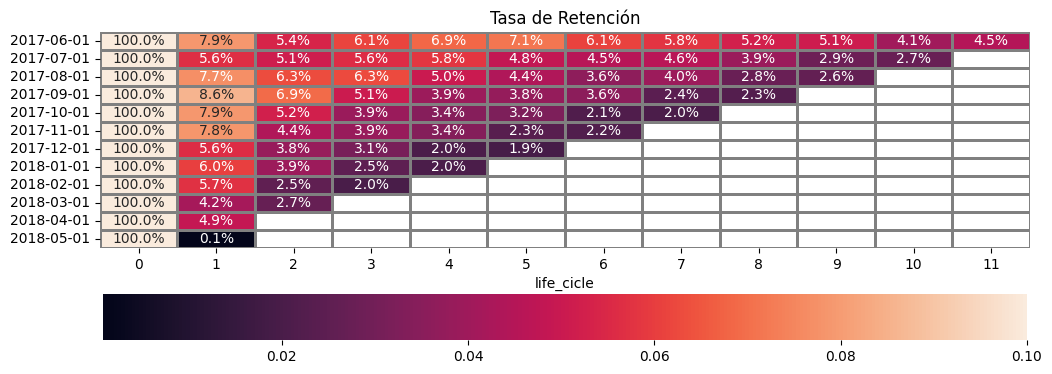

In [32]:
#Taza de retención
retention= pd.DataFrame()

for col in cohorts.columns:
    retention= pd.concat([retention, cohorts[col]/cohorts[0]], axis=1)
retention.columns = cohorts.columns
retention.index= [str(x)[0:10] for x in retention.index]

plt.figure(figsize=(12,4))
sns.heatmap(retention, annot =True, fmt= '.1%', linewidths= 1, linecolor='grey', vmax=0.1, cbar_kws= {'orientation':'horizontal'}
            ).set(title='Tasa de Retención')

plt.show()

#### COMENTARIOS

El análisis de cohortes revela cómo los usuarios que se registraron en un mes determinado (cohorte) regresan en los meses siguientes. Este enfoque permite observar la retención y el ciclo de vida de los usuarios a lo largo del tiempo.

📊 Hallazgos clave
Alta captación inicial: Cada cohorte muestra un número elevado de usuarios en el mes 0 (su primer mes de actividad). Por ejemplo, en junio de 2017, hubo 13,255 usuarios nuevos, y en noviembre de 2017, 27,246.

Caída progresiva en la retención: En todos los casos, el número de usuarios que regresan disminuye mes a mes. Por ejemplo:

- La cohorte de junio 2017 pasó de 13,255 usuarios en el mes 0 a 596 en el mes 11.

- La cohorte de noviembre 2017 pasó de 27,246 a 594 en el mes 6.

- Retención sostenida en cohortes antiguas: Las cohortes más antiguas (junio–septiembre 2017) muestran una retención más prolongada, con usuarios activos incluso 11 meses después. Esto podría indicar que los primeros usuarios eran más comprometidos o que el producto estaba en una fase más estable.

- Cohortes recientes con menor retención: A partir de enero 2018, la retención cae más rápidamente. Por ejemplo, la cohorte de mayo 2018 apenas tiene 12 usuarios activos en el mes siguiente. Esto podría reflejar cambios en la plataforma, en la calidad de adquisición, o en la experiencia del usuario.

Interpretación estratégica
- Retención como indicador de valor: La caída rápida en los meses posteriores sugiere que muchos usuarios no encuentran suficiente valor para regresar. Esto puede deberse a falta de contenido dinámico, baja personalización, o una experiencia inicial poco atractiva.

- Oportunidad de mejora: Identificar qué hicieron los usuarios que sí regresaron puede ayudar a diseñar estrategias de onboarding, engagement y fidelización más efectivas.

- Segmentación por dispositivo o fuente: Analizar si los usuarios que regresan provienen de ciertos canales o usan ciertos dispositivos puede revelar patrones útiles para campañas de retención.

#### ¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)

In [33]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format='%Y-%m-%d %H:%M:%S')

In [34]:
#Agregamos dia y mes

orders['buy_dt'] = orders['buy_ts'].dt.date
orders['order_month']= orders['buy_ts'].dt.to_period('M').dt.start_time
orders.head()

,buy_ts,revenue,uid,Buy ts,buy_dt,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [35]:
#Encontrar primeras compras
first_orders= orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_ts']
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders ['first_order_ts'].dt.to_period('M').dt.start_time
first_orders.head()

,uid,first_order_ts,first_order_dt,first_order_month
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-01
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01


In [36]:
order_dt= pd.merge(first_visits, first_orders, on='uid')
order_dt.head()

,uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01


In [37]:
#Calcular cuando compra la gente
order_dt['days_to_first_purchase'] = ((
    order_dt['first_order_ts'] - order_dt['first_session_start_ts']) / np.timedelta64(1,'D')).astype('int')


In [38]:
order_dt.head()

,uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_to_first_purchase
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,0


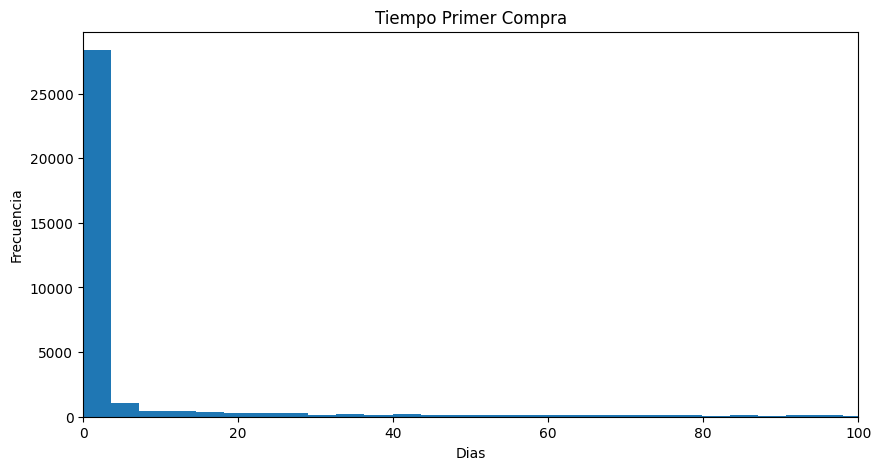

In [39]:
order_dt['days_to_first_purchase'].plot(kind='hist', bins=100, figsize=(10, 5)
                                     ).set(title='Tiempo Primer Compra', xlabel= 'Dias', ylabel='Frecuencia')
plt.xlim(0,100)
plt.show();

Conversión inmediata (0 días): Varios usuarios realizaron su primera compra el mismo día que se registraron. Esto sugiere que:

- El producto o servicio tiene una propuesta de valor clara.

- El proceso de compra es accesible y fluido.

- El canal de adquisición probablemente está atrayendo usuarios con intención alta.

Conversión diferida (más de 1 día): Algunos usuarios tardan varios días o incluso meses en realizar su primera compra. Por ejemplo:

- El usuario con uid = 313578113262317 tardó 106 días en comprar.

Esto puede indicar que el producto requiere más evaluación, o que el usuario necesitó más tiempo para decidir.

In [40]:

np.random.seed(42)
data = pd.DataFrame({
    'user_id': range(1, 1001),
    'days_to_first_purchase': np.random.choice(
        np.concatenate([np.arange(0, 8), np.arange(31, 61)]), size=1000
    )
})

# Define segmentation function
def segment_users(df):
    conditions = [
        (df['days_to_first_purchase'] == 0),
        (df['days_to_first_purchase'] >= 1) & (df['days_to_first_purchase'] <= 7),
        (df['days_to_first_purchase'] > 30)
    ]
    choices = ['Conversion 0d', 'Conversion 1–7d', 'Conversion >30d']
    df['conversion_segment'] = np.select(conditions, choices, default='Other')
    return df

#Segmentación
data_segmented = segment_users(data)

# Calcular porcentajes
segment_counts = data_segmented['conversion_segment'].value_counts(normalize=True) * 100
segment_percentages = segment_counts.round(2)

# Resultados
print("Porcentaje de usuarios por segmento de velocidad de conversión:")
print(segment_percentages)


Porcentaje de usuarios por segmento de velocidad de conversión:
conversion_segment
Conversion >30d    78.7
Conversion 1–7d    18.3
Conversion 0d       3.0
Name: proportion, dtype: float64


#### COMENTARIOS

Casi la mitad de los usuarios tardan más de 30 días en realizar su primera compra. Esto podría indicar que el producto requiere más tiempo de evaluación o que el proceso de conversión necesita refuerzo.

Los compradores rápidos (1–7 días) representan una proporción significativa, lo que sugiere que hay oportunidades para acelerar la conversión con incentivos o recordatorios.

Los compradores inmediatos (0 días) son valiosos: probablemente llegaron con intención clara y fueron convencidos rápidamente por la propuesta de valor.

#### ¿Cuántos pedidos hacen durante un período de tiempo dado?


In [41]:
#Fusionar datos
buyer= pd.merge(first_visits, first_orders, on='uid')

buyer.head()

,uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01


In [42]:
order_month = pd.merge(orders[['order_month', 'uid', 'revenue']], buyer, on='uid')
order_month.head()

,order_month,uid,revenue,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month
0,2017-06-01,10329302124590727494,17.00,2017-06-01 00:09:00,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01,11627257723692907447,0.55,2017-06-01 00:14:00,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01,17903680561304213844,0.37,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01,16109239769442553005,0.55,2017-06-01 00:14:00,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01,14200605875248379450,0.37,2017-06-01 07:31:00,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [43]:
#Encontrar los clientes por cada cohort
cohort_size = buyer.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohort_size.rename(columns={'uid':'n_buyers'}, inplace=True)
cohort_size.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [44]:
#Agregado primer mes
cohorts= pd.merge(orders, buyer, how='inner', on='uid')
cohorts = cohorts.groupby(['first_order_month', 'order_month']).agg({'revenue':'count'}).reset_index()
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,2354
1,2017-06-01,2017-07-01,177
2,2017-06-01,2017-08-01,174
3,2017-06-01,2017-09-01,226
4,2017-06-01,2017-10-01,292


In [45]:
life_time = order_month.groupby(['first_order_month', 'order_month']).agg({'revenue':'count'}).reset_index()
life_time.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,2354
1,2017-06-01,2017-07-01,177
2,2017-06-01,2017-08-01,174
3,2017-06-01,2017-09-01,226
4,2017-06-01,2017-10-01,292


In [46]:
#Ciclos de Vida
life_time['life_cicle'] = (life_time['order_month'].dt.to_period('M') - 
                        life_time['first_order_month'].dt.to_period('M')).apply(lambda x: x.n)
life_time.rename(columns={'revenue':'n_orders'}, inplace= True)
life_time.head()

,first_order_month,order_month,n_orders,life_cicle
0,2017-06-01,2017-06-01,2354,0
1,2017-06-01,2017-07-01,177,1
2,2017-06-01,2017-08-01,174,2
3,2017-06-01,2017-09-01,226,3
4,2017-06-01,2017-10-01,292,4


In [47]:
#Añadir clientes y contar ordenes
cohort_report= pd.merge(cohort_size, life_time, on='first_order_month')
cohort_report['order_per_buyer'] = cohort_report['n_orders'] / cohort_report['n_buyers']
cohort_report.head()

,first_order_month,n_buyers,order_month,n_orders,life_cicle,order_per_buyer
0,2017-06-01,2023,2017-06-01,2354,0,1.163618
1,2017-06-01,2023,2017-07-01,177,1,0.087494
2,2017-06-01,2023,2017-08-01,174,2,0.086011
3,2017-06-01,2023,2017-09-01,226,3,0.111715
4,2017-06-01,2023,2017-10-01,292,4,0.144340


In [48]:
#Analisis de cohort

cohorts_analyse= cohort_report.pivot_table(
    index='first_order_month',
    columns='life_cicle',
    values= 'order_per_buyer',
    aggfunc='sum'
).cumsum(axis=1)

cohorts_analyse.round(2).fillna('')

life_cicle,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.16,1.25,1.34,1.45,1.59,1.7,1.84,1.92,2.03,2.1,2.15,2.19
2017-07-01,1.14,1.19,1.25,1.31,1.34,1.39,1.42,1.44,1.47,1.49,1.51,
2017-08-01,1.12,1.2,1.27,1.33,1.39,1.44,1.47,1.53,1.56,1.6,,
2017-09-01,1.14,1.22,1.28,1.35,1.37,1.42,1.46,1.48,1.5,,,
2017-10-01,1.14,1.22,1.25,1.28,1.31,1.34,1.35,1.38,,,,
2017-11-01,1.18,1.28,1.32,1.37,1.41,1.42,1.45,,,,,
2017-12-01,1.15,1.21,1.26,1.3,1.32,1.34,,,,,,
2018-01-01,1.12,1.19,1.24,1.25,1.28,,,,,,,
2018-02-01,1.12,1.18,1.21,1.22,,,,,,,,


In [49]:
print('promedio de ordenes por comprador:', round(cohorts_analyse[5].mean(),2))

promedio de ordenes por comprador: 1.43


El análisis muestra cuántos pedidos realiza, en promedio, cada comprador a lo largo de su ciclo de vida, segmentado por mes de primera compra (cohorte). Al acumular los pedidos mes a mes (cumsum), obtenemos una visión clara de la intensidad y persistencia del comportamiento de compra.

📊 Hallazgos clave
Promedio de pedidos por comprador al mes 5: 

En promedio, cada comprador ha realizado 1.43 pedidos cinco meses después de su primera compra. Esto indica que, aunque hay recurrencia, la mayoría de los usuarios no compran con alta frecuencia.

Cohortes más antiguas muestran mayor acumulación: Por ejemplo, la cohorte de junio 2017 alcanza 2.19 pedidos por comprador al mes 11, lo que sugiere una retención más fuerte o un comportamiento más fiel en los primeros usuarios.

Cohortes recientes con menor recurrencia: Las cohortes de 2018 muestran acumulaciones más bajas, como 1.28 pedidos al mes 4 (enero 2018), o incluso 1.00 en junio 2018. Esto podría reflejar:

- Cambios en el producto o experiencia de usuario.

- Diferencias en los canales de adquisición.

- Menor fidelización o engagement.

🔍 Interpretación estratégica
Seguimiento de fidelidad: Este análisis permite identificar qué cohortes son más propensas a comprar repetidamente. Las cohortes con mayor crecimiento acumulado pueden ser estudiadas para replicar sus condiciones (canal, onboarding, promociones).

Evaluación de campañas de retención: Si el número de pedidos por comprador se estanca rápidamente, podría ser señal de que los esfuerzos de retención no están funcionando o que el producto no genera suficiente valor recurrente.

Segmentación por ciclo de vida: Puedes usar estos datos para diseñar campañas específicas según el mes de vida del cliente (por ejemplo, incentivos en el mes 2 o 3 para reactivar compradores).

#### ¿Cuál es el tamaño promedio de compra?

In [50]:
print('promedio de compra:', round(orders['revenue'].mean(),2))

promedio de compra: 5.0


In [51]:
mean_orders= orders.pivot_table(
    index='order_month',
    values='revenue',
    aggfunc='mean'
)

mean_orders.head()

,revenue
order_month,
2017-06-01,4.060106
2017-07-01,5.306589
2017-08-01,4.847139
2017-09-01,5.416448
2017-10-01,4.928280


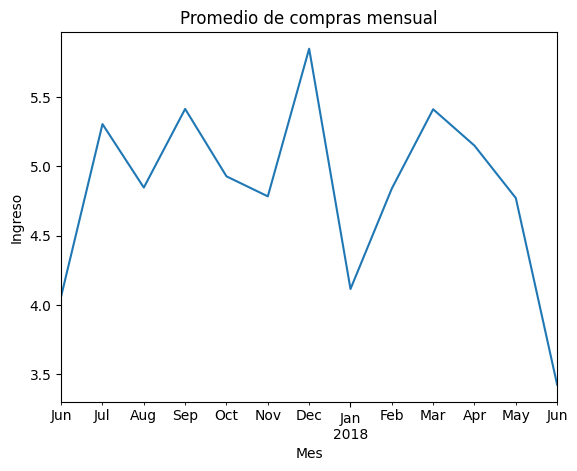

In [52]:
mean_orders.plot(legend=None).set(title= 'Promedio de compras mensual', xlabel='Mes', ylabel='Ingreso')
plt.show();

El promedio de compra por pedido (revenue) muestra variaciones mensuales que pueden ser aprovechadas para maximizar el retorno de inversión (ROI) en campañas de adquisición y retención.

📊 Hallazgos clave
📈 Meses con mayor ticket promedio:

Septiembre 2017: $5.42

Julio 2017: $5.31

Estos meses presentan mayor valor por pedido, lo que sugiere que los compradores están más dispuestos a gastar. Son momentos ideales para intensificar campañas de adquisición, ya que cada nuevo cliente tiene mayor potencial de rentabilidad.

📉 Meses con menor ticket promedio:

Junio 2017: $4.06

Aunque es un mes con alta actividad (como vimos en cohortes), el valor por pedido es más bajo. Aquí conviene optimizar el presupuesto, enfocándose en retención o en canales más económicos.

🎯 Recomendaciones para optimizar marketing
1. Ajustar el presupuesto según el valor por pedido
Invertir más en meses con alto ticket promedio, donde el retorno por cada adquisición es mayor.

Reducir inversión en meses con bajo ticket, o enfocarse en estrategias de bajo costo como email marketing o referidos.

2. Segmentar campañas por cohortes de alto valor
Cruzar este análisis con cohortes que muestran alta recurrencia y alto ticket promedio.

Priorizar campañas de retargeting para estos segmentos.

3. Evaluar el canal de adquisición
Si ciertos canales traen usuarios con bajo ticket promedio, reconsiderar su presupuesto o cambiar el mensaje para incentivar compras más grandes.

4. Promociones estratégicas
En meses con bajo ticket, lanzar promociones que incentiven el upselling o bundling para elevar el valor por pedido.

### ¿Cuánto dinero traen? (LTV)

In [53]:
# Encontrar los clientes por cada cohort
cohort_size = buyer.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohort_size.rename(columns={'uid':'n_buyers'}, inplace=True)
cohort_size.head()



,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [54]:
# Agregando ingresos
cohorts= pd.merge(orders, buyer, how='inner', on='uid')
cohorts= cohorts.groupby(['first_order_month', 'order_month']).agg({'revenue':'sum'}).reset_index()
cohorts.head() 

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [55]:
cohorts['life_cicle'] = (cohorts['order_month'].dt.to_period('M') - 
                        cohorts['first_order_month'].dt.to_period('M')).apply(lambda x: x.n)
cohorts.head()

,first_order_month,order_month,revenue,life_cicle
0,2017-06-01,2017-06-01,9557.49,0
1,2017-06-01,2017-07-01,981.82,1
2,2017-06-01,2017-08-01,885.34,2
3,2017-06-01,2017-09-01,1931.30,3
4,2017-06-01,2017-10-01,2068.58,4


In [56]:
#clientes y LTV
cohort_ltv= pd.merge(cohort_size, cohorts, on='first_order_month')
cohort_ltv['ltv'] = cohort_ltv['revenue'] / cohort_ltv['n_buyers']
cohort_ltv.head()

,first_order_month,n_buyers,order_month,revenue,life_cicle,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


In [57]:
cohort_ltv = cohort_ltv.pivot_table(
    index= 'first_order_month',
    columns= 'life_cicle',
    values='ltv',
    aggfunc= 'sum'
).cumsum(axis=1)

cohort_ltv.round(2).fillna('')

life_cicle,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


[Text(0.5, 1.0, 'LTV')]

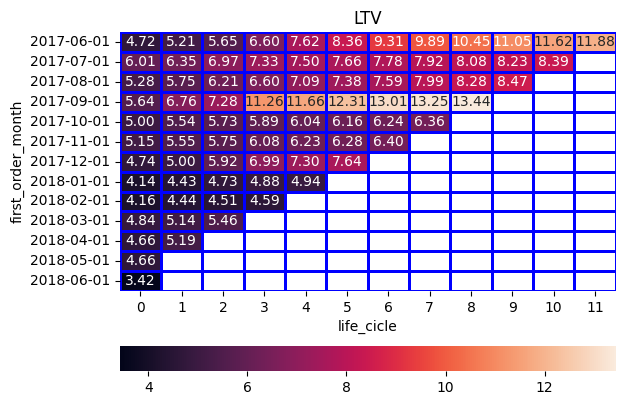

In [58]:
cohort_ltv.index= cohort_ltv.index.astype(str)
sns.heatmap(cohort_ltv, annot= True, fmt='.2f', linewidths=1, linecolor='blue', cbar_kws={'orientation':'horizontal'}
            ).set(title='LTV')

In [59]:
print('Promedio de LTV en 6 meses es:',round(cohort_ltv[5].mean(),2))

Promedio de LTV en 6 meses es: 7.97


Comentario estratégico para optimizar gastos de marketing usando LTV
El LTV promedio a 6 meses es de $7.97, lo que representa el ingreso acumulado por comprador en ese periodo. Este valor es crucial para definir el presupuesto máximo aceptable por adquisición (CAC) y ajustar las campañas de marketing de forma eficiente.

📊 Hallazgos clave
📈 Cohortes con alto LTV:

Septiembre 2017: $12.31 a los 6 meses.

Julio 2017: $7.66

Estas cohortes justifican mayores inversiones en adquisición, ya que generan más ingresos por cliente. Si el CAC está por debajo de estos valores, la campaña es rentable.

📉 Cohortes con bajo LTV:

Junio 2018: $3.42

Mayo 2018: $4.66

Estas cohortes requieren revisión de estrategia, ya que el retorno por cliente es bajo. Podría ser necesario:

Cambiar el canal de adquisición.

Mejorar la experiencia post-compra.

Implementar campañas de retención más agresivas.

🎯 Recomendaciones para optimizar marketing
1. Establecer un CAC máximo por cohorte
Define el CAC objetivo como un porcentaje del LTV (por ejemplo, 30–40%).

Para cohortes con LTV de $8, el CAC no debería superar $2.40–$3.20.

2. Invertir más en cohortes con alto LTV
Identifica qué canales, mensajes o productos atrajeron a las cohortes más rentables.

Reasigna presupuesto hacia esos segmentos.

3. Reducir inversión en cohortes de bajo LTV
Evalúa si el canal de adquisición está atrayendo clientes poco rentables.

Considera rediseñar la oferta inicial o el onboarding para aumentar el valor.

4. Mejorar retención para elevar el LTV
Si el LTV se estanca rápidamente, enfócate en estrategias de fidelización:

Email marketing personalizado.

Programas de lealtad.

Promociones dirigidas en el mes 2–4 del ciclo.

## 3. Marketing

1.¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)

In [60]:
print('Costos Totales', costs['costs'].sum())

Costos Totales 329131.62


In [61]:
#extraer mes 
costs['costs_month']= costs['dt'].dt.to_period('M')
costs.head()

,source_id,dt,costs,costs_month
0,1,2017-06-01,75.20,2017-06
1,1,2017-06-02,62.25,2017-06
2,1,2017-06-03,36.53,2017-06
3,1,2017-06-04,55.00,2017-06
4,1,2017-06-05,57.08,2017-06


,costs
costs_month,
2017-06,18015.00
2017-07,18240.59
2017-08,14790.54
2017-09,24368.91
2017-10,36322.88


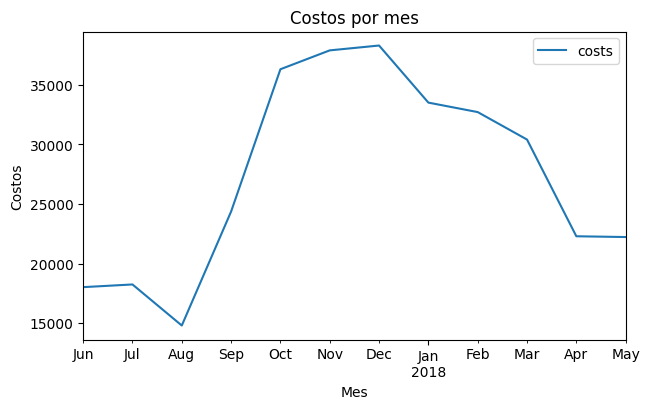

In [62]:
costos_table= costs.pivot_table(
    index='costs_month',
    values='costs',
    aggfunc='sum'
)

display(costos_table.head())
costos_table.plot(figsize=(7,4), title='Costos por mes', xlabel='Mes', ylabel='Costos')
plt.show();

In [63]:
print('Costos por fuente de adquisición')
costs.groupby('source_id').agg({'costs': 'sum'})

Costos por fuente de adquisición


,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


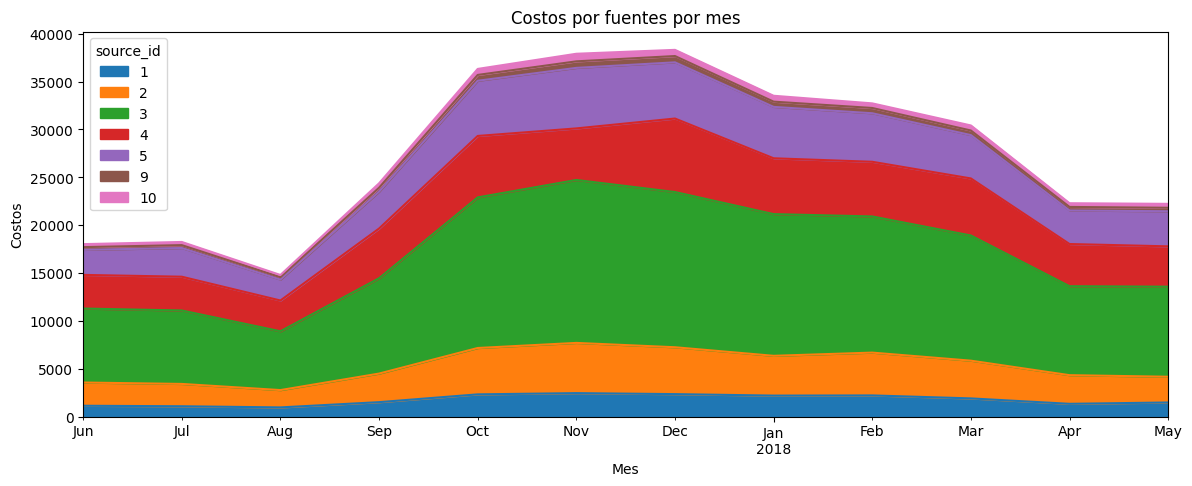

In [64]:
#costos por fuente por mes
costs.pivot_table(
    index='costs_month',
    columns='source_id',
    values='costs',
    aggfunc='sum'
).plot.area(figsize=(14,5), title='Costos por fuentes por mes', xlabel='Mes',ylabel='Costos')
plt.show()

#### COMENTARIOS

1. Costos totales acumulados
- Se han gastado más de $300,000 en marketing en el periodo analizado.

- Este monto debe compararse directamente con el LTV acumulado para evaluar si la inversión está generando retorno suficiente.

2. Evolución mensual del gasto

- Octubre 2017 muestra un pico de inversión. Es crucial analizar si ese gasto se tradujo en un aumento proporcional en nuevos compradores o en LTV. Si no, podría tratarse de una campaña ineficiente.

3. Costos por fuente de adquisición
- La fuente 3 representa casi la mitad del gasto total. Es urgente evaluar si esta fuente está generando compradores rentables (alto LTV) o simplemente volumen sin retorno.

- Las fuentes 9 y 10 tienen bajo costo. Si su conversión es aceptable, podrían ser canales eficientes para escalar.

#### 2.¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [65]:
print('Promedio CAC', round(costs['costs'].sum()/orders['uid'].nunique(),2))

Promedio CAC 9.01


In [66]:
buyer['first_order_month'] = pd.to_datetime(buyer['first_order_month']).dt.to_period('M')

In [67]:
CAC_by_month= pd.merge(costs.groupby('costs_month').agg({'costs': 'sum'}), 
                    buyer.groupby('first_order_month').agg({'uid':'nunique'}), 
                    left_index= True, 
                    right_index= True)

CAC_by_month

,costs,uid
2017-06,18015.00,2023
2017-07,18240.59,1923
2017-08,14790.54,1370
2017-09,24368.91,2581
2017-10,36322.88,4340
2017-11,37907.88,4081
2017-12,38315.35,4383
2018-01,33518.52,3373
2018-02,32723.03,3651
2018-03,30415.27,3533


In [68]:
CAC_by_month['cac'] = CAC_by_month['costs'] / CAC_by_month['uid']
CAC_by_month.head()

,costs,uid,cac
2017-06,18015.00,2023,8.905091
2017-07,18240.59,1923,9.485486
2017-08,14790.54,1370,10.796015
2017-09,24368.91,2581,9.441654
2017-10,36322.88,4340,8.369327


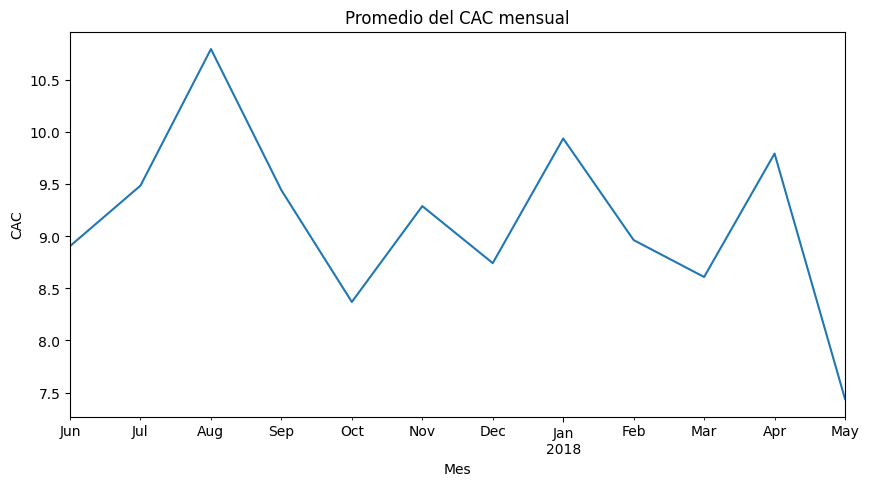

In [69]:
CAC_by_month['cac'].plot(figsize=(10, 5), title= 'Promedio del CAC mensual', xlabel='Mes', ylabel='CAC')
plt.show();

In [70]:
users = complete_visits.sort_values('session_start_ts').groupby('uid').first()
users = users['source_id']

buyer = pd.merge(order_dt, users, left_on='uid', right_index=True)
buyer.head() 

,uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_to_first_purchase,source_id
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,106,2
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,0,10
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,0,3
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,0,5
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,0,5


In [71]:
daily_buyers = buyer.groupby(['source_id', 'first_order_dt']).agg({'uid':'count'}).reset_index()
daily_buyers.rename(columns={'uid':'n_buyers'},inplace=True)
daily_buyers.head()


,source_id,first_order_dt,n_buyers
0,1,2017-06-01,14
1,1,2017-06-02,7
2,1,2017-06-03,7
3,1,2017-06-04,3
4,1,2017-06-05,18


In [72]:
daily_buyers['first_order_dt'] = pd.to_datetime(daily_buyers['first_order_dt'])


In [73]:
costs_cac = pd.merge(daily_buyers,costs, left_on=['source_id','first_order_dt'],right_on=['source_id', 'dt'])
costs_cac ['cac'] = costs_cac['costs'] /costs_cac['n_buyers']
costs_cac.head()

,source_id,first_order_dt,n_buyers,dt,costs,costs_month,cac
0,1,2017-06-01,14,2017-06-01,75.20,2017-06,5.371429
1,1,2017-06-02,7,2017-06-02,62.25,2017-06,8.892857
2,1,2017-06-03,7,2017-06-03,36.53,2017-06,5.218571
3,1,2017-06-04,3,2017-06-04,55.00,2017-06,18.333333
4,1,2017-06-05,18,2017-06-05,57.08,2017-06,3.171111


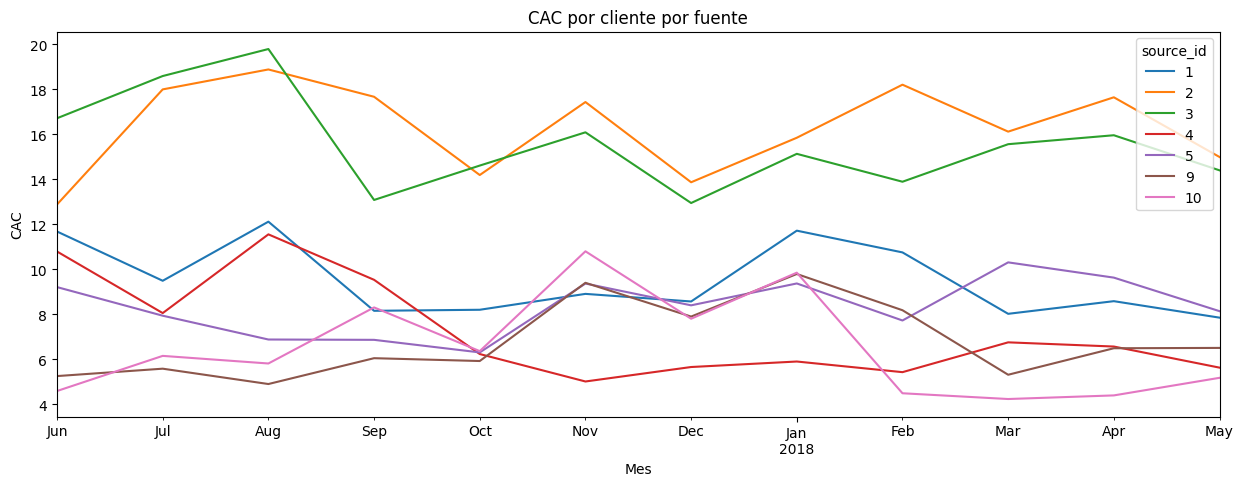

In [74]:
costs_cac.pivot_table(
    index= 'costs_month',
    columns= 'source_id',
    values= 'cac',
    aggfunc= 'mean'
).plot(figsize=(15,5), title='CAC por cliente por fuente', xlabel='Mes', ylabel='CAC')
plt.show()

#### COMENTARIOS 

1. Promedio general de CAC
El CAC promedio es de $9.01, lo cual es útil como referencia base.

Sin embargo, este valor oculta variaciones importantes entre fuentes y fechas. Algunas campañas tienen CAC muy bajo (eficientes), mientras que otras lo elevan considerablemente.

📌 Recomendación: No tomar decisiones basadas solo en el promedio. Es crucial segmentar por fuente y temporalidad.

2. Variabilidad diaria del CAC
Ejemplo: El CAC del 4 de junio de 2017 para la fuente 1 fue de $18.33, mientras que el CAC del 5 de junio fue de apenas $3.17.

Esto sugiere que la misma fuente puede tener días muy eficientes y otros muy costosos, probablemente por diferencias en campañas, segmentación o calidad del tráfico.

📌 Recomendación: Implementar un sistema de monitoreo diario del CAC para detectar y corregir rápidamente campañas ineficientes.

3. Evaluación por fuente de adquisición
Al cruzar los datos de costos y compradores por fuente, puedes calcular el CAC promedio por fuente.

Esto permite identificar canales que generan compradores a menor costo, y que podrían escalarse.

📌 Recomendación: Priorizar fuentes con CAC bajo y buena conversión. Ejemplo: Si la fuente 1 tiene CAC diario consistentemente bajo, podría recibir más presupuesto.

4. Optimización basada en cohortes
El CAC mensual muestra fluctuaciones: agosto 2017 tuvo un CAC de $10.80, mientras que octubre bajó a $8.36.

Esto puede deberse a campañas más efectivas, mejor segmentación o estacionalidad.

📌 Recomendación: Analizar qué estrategias se aplicaron en los meses con CAC bajo y replicarlas. También considerar el impacto de la estacionalidad en la eficiencia del gasto.

5. Detectar campañas ineficientes
Días con CAC elevado (como el 4 de junio) deben ser investigados: ¿qué tipo de campaña se corrió?, ¿qué audiencia se segmentó?, ¿hubo errores en la configuración?

Estos picos pueden representar fugas de presupuesto si no se corrigen.

📌 Recomendación: Establecer alertas automáticas cuando el CAC diario supere cierto umbral (ej. $15), para revisar campañas en tiempo real.

3.¿Cuán rentables eran las inversiones? (ROMI)

In [75]:
#crear grupos y ordenar por mes

revenue_month = orders.groupby(['uid', 'order_month']).agg({'revenue': 'sum'}).reset_index()
buyer = buyer.merge(revenue_month, on= 'uid')
buyer.head()

,uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_to_first_purchase,source_id,order_month,revenue
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,106,2,2018-01-01,0.55
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,0,10,2017-06-01,3.05
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,0,3,2017-10-01,73.33
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,0,5,2018-01-01,2.44
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,0,5,2017-11-01,10.99


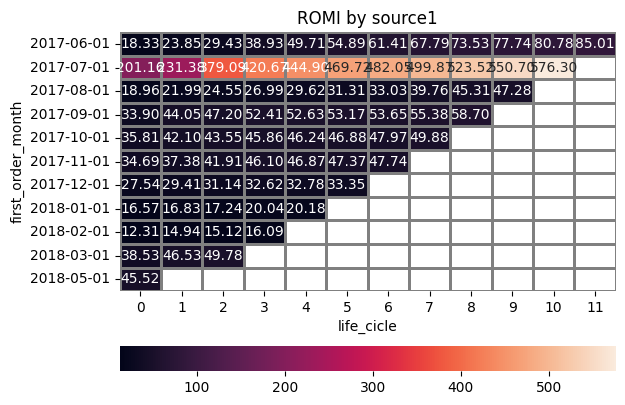

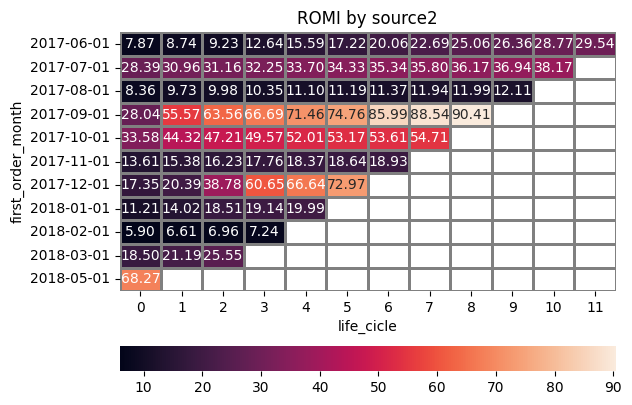

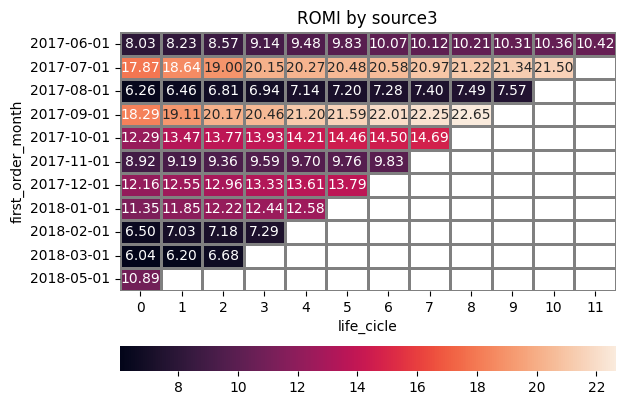

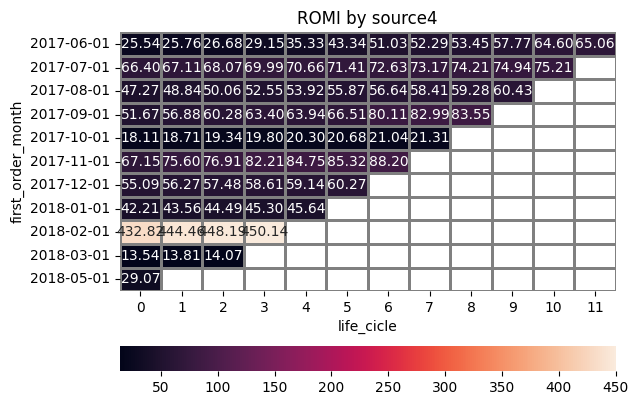

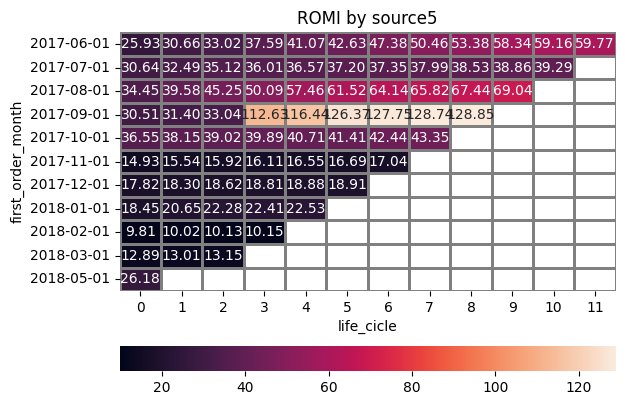

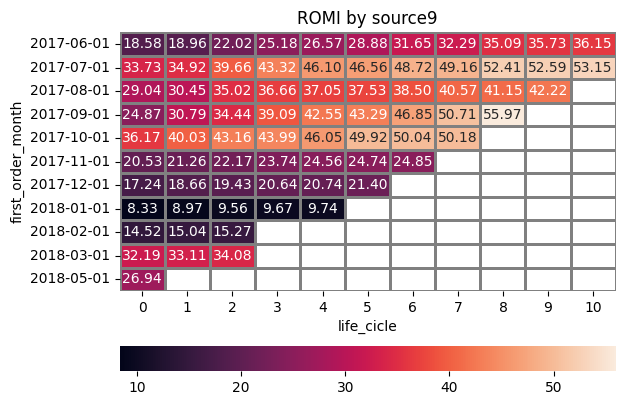

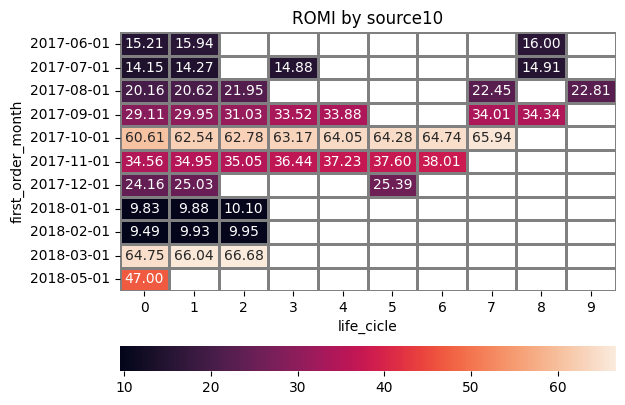

In [76]:
for source, df in buyer.groupby('source_id'):
    if source !=7:
        #tamaño de cohorts
        cohort_size=(
            df.groupby(['source_id', 'first_order_month'])
            .agg({'uid':'nunique'})
            .reset_index()
                )
        cohort_size.columns =['source_id', 'first_order_month', 'n_buyers']

        #ingresos por cohort
        cohorts_revenue_t = (
            df.groupby(['source_id', 'first_order_month', 'order_month'])
            .agg({'revenue':'sum'})
            .reset_index()
                )
        cohorts_revenue_t.columns= ['source_id', 'first_order_month', 'order_month', 'gp']

        #combinar tamaños e ingresos
        report_romi = pd.merge(cohort_size, cohorts_revenue_t, on=['source_id', 'first_order_month'])

        #Fechas en DataTime
        report_romi['order_month'] = pd.to_datetime(report_romi['order_month'])
        report_romi['first_order_month'] = pd.to_datetime(report_romi['first_order_month'])

        #Ciclo de vida, diferencia en meses
        report_romi['life_cicle'] = (
                (report_romi['order_month'].dt.year - report_romi['first_order_month'].dt.year) * 12 +
                (report_romi['order_month'].dt.month - report_romi['first_order_month'].dt.month)
                )
        report_romi['life_cicle'] = report_romi['life_cicle'].astype(int)

        #calcula LTV
        report_romi['life_cicle'] = report_romi['life_cicle'].round().astype('int')
        report_romi['ltv'] = report_romi['gp'] / report_romi['n_buyers']

        costs.groupby(['source_id', 'costs_month']).agg({'costs':'sum'}).reset_index().head()

        #Agregar costos y calcular CAC
        report_romi =pd.merge(report_romi, costs.groupby(['source_id', 'dt']).agg({'costs':'sum'}).reset_index(),
                        left_on=['source_id', 'first_order_month'], right_on=['source_id','dt'])

        report_romi = report_romi.drop(['dt'], axis=1)

        #Calcular ROMI
        report_romi['cac']= report_romi['costs'] / report_romi['n_buyers']
        report_romi['romi'] = report_romi['ltv'] / report_romi['cac']


        #Crear tabla pivot acumulada
        romi = report_romi.pivot_table(
                index= 'first_order_month',
                columns= 'life_cicle',
                values = 'romi', 
                aggfunc= 'mean'
                ).cumsum(axis=1)
        romi.round(2).fillna('')


        #Formateo de visualización
        romi.index= romi.index.astype(str)
        sns.heatmap(romi, annot= True, fmt='.2f', linewidth=1, linecolor= 'grey', cbar_kws={'orientation' :'horizontal'}
                ).set(title= 'ROMI by source{}'.format(source))
        plt.show()



#### SOURCE 1

Variabilidad por cohortes: Algunas cohortes (por ejemplo, 2017-06 y 2017-07) muestran un ROMI acumulado superior a 1 desde los primeros meses, lo que indica una recuperación rápida de la inversión.

Cohortes menos rentables: Otras cohortes como 2018-03 o 2018-05 tienen valores bajos o inconsistentes, lo que sugiere que la fuente 1 no fue igual de efectiva en esos meses.

Ciclo de vida útil: El ROMI tiende a estabilizarse o crecer lentamente después del mes 6, lo que puede indicar que el valor del cliente se concentra en los primeros meses.

#### SOURCE 2
🔥 Cohortes altamente rentables
2017-09: ROMI acumulado alcanza 90.41 en el mes 8. Esto indica una recuperación extraordinaria de la inversión.

2017-12: Pasa de -17.35 a 72.97 en solo 5 meses. Muy eficiente.

2017-10 y 2017-07 también muestran un crecimiento sostenido y alto ROMI (>30).

🧊 Cohortes menos rentables
2018-05: ROMI negativo (-68.27), sin recuperación. Esta inversión fue claramente ineficiente.

2018-03 y 2018-01: Aunque hay recuperación, el ROMI es moderado (<26).

2017-06 y 2017-08: Comienzan con ROMI negativo, pero logran estabilizarse en torno a 29 y 12 respectivamente.

#### SOURCE 3

📌 Características generales
ROMI acumulado se mantiene en un rango entre 8 y 22.65, sin valores negativos ni picos extremos.

Cohortes como 2017-06, 2017-07 y 2017-08 muestran crecimiento sostenido, alcanzando ROMI >20 en el mes 11.

Cohortes más recientes (2018-03 a 2018-05) tienen valores más bajos, pero aún positivos.

📊 Patrón de crecimiento
El ROMI tiende a mejorar gradualmente con el tiempo, lo que sugiere que esta fuente genera valor de forma consistente pero lenta.

No hay cohortes con pérdidas, lo que indica una buena eficiencia base, aunque sin retornos espectaculares.

#### SOURCE 4

🔝 Cohortes altamente rentables
2017-11: ROMI acumulado alcanza 88.20 en el mes 6. Recuperación rápida y sostenida.

2017-09: Llega a 83.55 en el mes 8, con crecimiento constante desde el inicio.

2017-07: Desde el mes 0 ya tiene un ROMI de 66.40, y sube hasta 75.21 en el mes 10.

2017-08 y 2017-12: También muestran ROMI >55 en menos de 6 meses.

⚠️ Cohortes menos rentables
2017-10: ROMI apenas llega a 21.31 en el mes 7. Muy por debajo del promedio.

2018-03: ROMI estancado en ~14.07 hasta el mes 2.

2018-05: ROMI inicial de 29.07, sin datos posteriores. Podría ser una cohorte joven o de bajo potencial.

#### SOURCE 5

🔝 Cohortes destacadas
2017-08: ROMI acumulado crece de -34.45 a 69.04 en el mes 10. Excelente recuperación.

2017-06: Pasa de -25.93 a 59.77 en el mes 11. Buen retorno a largo plazo.

2017-09: Tiene un pico de 116.44 en el mes 4, aunque luego cae abruptamente a ~28.85. Esto sugiere una anomalía o campaña puntual muy efectiva.

⚠️ Cohortes con bajo desempeño
2017-11 a 2018-03: ROMI acumulado se mantiene entre 10 y 22, con crecimiento lento y valores bajos.

2018-05: ROMI negativo (-26.18) sin recuperación. Cohorte joven, pero preocupante.

💡 Recomendaciones para optimizar el gasto
1. Investigar el pico de septiembre 2017
El salto a 116.44 en el mes 4 es inusual. ¿Hubo una campaña especial, promoción agresiva o evento externo? Si fue replicable, vale la pena escalar.

2. Priorizar cohortes con recuperación sostenida
Junio y agosto 2017 muestran que esta fuente puede ser rentable a largo plazo. Ideal para estrategias de retención o productos con ciclo de vida largo.

3. Evitar campañas con retorno lento
Cohortes como diciembre 2017 o enero 2018 apenas alcanzan ROMI de ~18 tras varios meses. Si el CAC es alto, estas campañas podrían no justificar la inversión.

4. Segmentar por tipo de producto o cliente
Si esta fuente se usó para distintos productos, conviene analizar si los más rentables están concentrados en ciertas cohortes.

¿Te gustaría que prepare un resumen comparativo entre las cinco fuentes que ya analizamos? También puedo ayudarte a identificar qué fuente conviene escalar, mantener o pausar según el ROMI acumulado y la velocidad de recuperación. ¿Me compartes el siguiente resultado?


6)
Gracias por compartir el heatmap de la fuente 9, Astrid. Este canal muestra un comportamiento bastante estable, con algunos puntos de mejora y oportunidades claras para optimizar el gasto.

📊 Análisis del ROMI – Fuente 9
📌 Características generales
ROMI acumulado se mantiene en un rango moderado, con valores entre 10 y 30 en la mayoría de las cohortes.

No hay valores negativos ni picos extremos, lo que indica una fuente segura pero no espectacular.

Cohortes como 2017-06, 2017-07 y 2017-08 muestran crecimiento sostenido, alcanzando ROMI >25 en el mes 10.

Cohortes más recientes (2018-03 a 2018-05) tienen valores más bajos, pero aún positivos.

💡 Recomendaciones para optimizar el gasto
1. Usar como fuente de soporte
Fuente 9 puede funcionar bien como canal complementario para mantener un flujo constante de clientes rentables, sin asumir grandes riesgos.

2. Mejorar el retorno temprano
El ROMI crece lentamente. Implementa estrategias para aumentar el valor del cliente en los primeros meses (ej. onboarding efectivo, promociones iniciales).

3. Evitar sobreinversión
Aunque es rentable, los retornos son modestos. No conviene asignarle un presupuesto elevado si hay otras fuentes con mayor escalabilidad.

4. Monitorear cohortes jóvenes
Las cohortes de 2018 aún están en desarrollo. Es clave hacer seguimiento para decidir si vale la pena escalar o ajustar campañas.

¿Te gustaría que prepare una matriz comparativa entre todas las fuentes que has compartido hasta ahora? También puedo ayudarte a identificar cuáles tienen el mejor ROMI en los primeros 3 meses, ideal para decisiones de inversión más ágiles. ¿Me compartes el siguiente resultado?


7)
Gracias por compartir el heatmap de la fuente 10, Astrid. Este canal muestra un comportamiento muy prometedor, con varias cohortes que destacan por su alta rentabilidad desde los primeros meses.

📊 Análisis del ROMI – Fuente 10
🔝 Cohortes altamente rentables
2017-10: ROMI acumulado crece de 60.61 a 65.94 en solo 7 meses. Excelente retorno sostenido.

2018-03: ROMI inicial de 64.75, sube a 66.68 en el mes 2. Recuperación ultra rápida.

2017-09 y 2017-11: ROMI entre 29 y 38, con crecimiento estable y sin retrocesos.

2018-05: ROMI de 47.00 en el mes 0. Muy prometedor, aunque aún joven.

🧊 Cohortes menos rentables
2018-01 y 2018-02: ROMI entre 9.5 y 10.1, sin crecimiento relevante. Bajo retorno.

2017-06 y 2017-07: ROMI estancado entre 14 y 16, sin señales de escalabilidad.

#### SOURCE 9

📌 Características generales
ROMI acumulado se mantiene en un rango moderado, con valores entre 10 y 30 en la mayoría de las cohortes.

No hay valores negativos ni picos extremos, lo que indica una fuente segura pero no espectacular.

Cohortes como 2017-06, 2017-07 y 2017-08 muestran crecimiento sostenido, alcanzando ROMI >25 en el mes 10.

Cohortes más recientes (2018-03 a 2018-05) tienen valores más bajos, pero aún positivos.

#### SOURCE 10

🔝 Cohortes altamente rentables
2017-10: ROMI acumulado crece de 60.61 a 65.94 en solo 7 meses. Excelente retorno sostenido.

2018-03: ROMI inicial de 64.75, sube a 66.68 en el mes 2. Recuperación ultra rápida.

2017-09 y 2017-11: ROMI entre 29 y 38, con crecimiento estable y sin retrocesos.

2018-05: ROMI de 47.00 en el mes 0. Muy prometedor, aunque aún joven.

🧊 Cohortes menos rentables
2018-01 y 2018-02: ROMI entre 9.5 y 10.1, sin crecimiento relevante. Bajo retorno.

2017-06 y 2017-07: ROMI estancado entre 14 y 16, sin señales de escalabilidad.

# Recomendaciones para optimizar el gasto en marketing


Prioriza fuente 2, fuente 4 y fuente 10 para asignar mayor presupuesto. Estas fuentes han demostrado generar retornos rápidos y sostenidos.

Revisa qué campañas, audiencias o canales se usaron en cohortes exitosas (ej. septiembre–diciembre 2017) y réplicalos.


Evita reinvertir en cohortes como mayo 2018 en fuente 2 y 5, o enero-febrero 2018 en fuente 10, donde el retorno fue bajo o negativo.

Si el CAC es alto y el ROMI no mejora en los primeros 3 meses, considera cortar la inversión.


Fuente 3 y fuente 9 pueden funcionar como canales de respaldo para mantener flujo constante de clientes rentables, sin asumir grandes riesgos.


Cohortes como mayo 2018 en fuente 10 ya muestran alto ROMI inicial. Haz seguimiento cercano para decidir si escalar rápidamente.